In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import scipy.stats as stats
from scipy.optimize import curve_fit
import random

import matplotlib  
from matplotlib import colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.gridspec as gridspec
import  matplotlib.markers as mark


from matplotlib.legend_handler import HandlerPatch
import matplotlib.patches as mpatches

# sns.set_context('paper', font_scale=1) 

# importing our manual plotting utils
from utils import *
from mpmath import *

In [2]:
# paths
save_fig_path ="../results/coalescence/"
data_path  = "../results/coalescence/"

In [30]:
def plot_coal(ax, m_net, act_uniq, avg_mcoal_vsAct, std_mcoal_vsAct, col, ms = 1, mew = 5, cErrCoal="#FFD6D0"):
    m_eff = m_net-avg_mcoal_vsAct
#     ax.errorbar(act_uniq,m_net-avg_mconv_vsAct,yerr=std_mconv_vsAct, fmt='o', color=col, ms=ms, mew=mew,\
#                ecolor=cErrCoal) 
#     ax.errorbar(act_uniq, m_eff, fmt='o', color=col, ms=ms, mew=mew)
    ax.plot(act_uniq, m_eff, color=col,lw = lw, label = r'$k=1$')
    ax.fill_between(act_uniq, m_eff-std_mcoal_vsAct, m_eff+ std_mcoal_vsAct, color=cErrCoal)
    
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    return ax

# figure for coalescence and adaptive BP

In [4]:
# plotting params
minlogbin = 9
maxlogbin = 10**7
nlogbings = 60


maxxLim = 2*10**3
ylim = [5*10**-8, 5*10**-1]
ylim = [5*10**-8, 1.5]
cm = 1/2.54 # inch to cm

lw = 2

ms = 3.5
mew = 0.5
# cCoal = '#FA945C'
# cCoal = '#FA8073'
cCoal = '#BA6056'
# cErrCoal ='#E0E0E0'
cErrCoal ='#FFD6D0'

activity_label = r'$A$'
meff_label = r'$m_\mathdefault{eff}(A)$'
hL = 1.4

In [5]:
#---------- load data
# network data for m = 1
data_coal = np.load(data_path +'mcoal_' +'uniform_k1_size128_m1.0_ps0.5.npy',allow_pickle=True)
act_uniq = data_coal[2]
avg_mcoal_vsAct = data_coal[0]
std_mcoal_vsAct = data_coal[1]
av_size = data_coal[-1]
m_net = 1

# network data for m = critical
data_coal = np.load(data_path +'mcoal_' +'uniform_k1_size128_m1.107_ps0.5.npy',allow_pickle=True)
act_uniq_crit = data_coal[2]
avg_mcoal_vsAct_crit = data_coal[0]
std_mcoal_vsAct_crit = data_coal[1]
av_size_crit = data_coal[-1]
m_net_crit = 1.107

# adaptive BP data
av_size_bp = np.load(data_path +'/avAdapt_uniform_k1_size128_m1.0_ps0.5.npy')
av_size_bp_crit = np.load(data_path +'m_conv/avAdapt_uniform_k1_size128_m1.107_ps0.5.npy')

- version 2, revision with theoretical mean-field coalesence

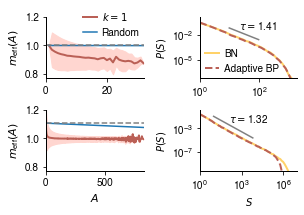

In [43]:
fig, axs = plt.subplots(2, 2, figsize=(11*cm, 8*cm))

# plt.subplots_adjust(hspace=0.25, wspace=0.3)

# parameters for fitting avalanches
avFit_percent = 0.95 # picking 95% of distribution for xmax
plot_fit = 1

#----------- m = 1
maxxLim = 2*10**3
# maxxLim = 10**7
ylim = [7*10**-8, 1.5]
ylim_coal = [0.77, 1.2]

ax = axs[0,0]
ax = plot_coal(ax, m_net, act_uniq, avg_mcoal_vsAct, std_mcoal_vsAct, cCoal, ms, mew)

N = 128*128
A = act_uniq
m = m_net
rand_net_theory_coal = (N/A) * (1 - (1 - m/N)** A)
ax.plot(A, rand_net_theory_coal, label = r'Random')

ax.legend(frameon = False, handletextpad= hPad, handlelength = hL, \
          loc = 'upper right', bbox_to_anchor=[1.05, 1.25])

ax.axhline(m_net, ls = '--', color = 'gray', lw = 1.5)
ax.set_ylabel(meff_label, fontsize = 11)
# ax.set_xlabel(activity_label, fontsize = 11)
ax.set_ylim(ylim_coal)
ax.set_xlim([0, max(A)])

ax = axs[0,1]
col = '#FFD269' #cK[1][128] #cK1L3
label = r'BN'
alpha = plot_av(ax, av_size, minlogbin, maxlogbin, nlogbings, col, lw, ls, label, plot_fit,\
                 fit_zeroValue = 1.9, ls_powerlaw = '-')
ax.text(0.4,0.8,r'$\tau = $' + str(round(alpha,2)),color='k', transform=ax.transAxes)
col = cCoal
label = 'Adaptive BP'
lsCoal = '--'
plot_av(ax, av_size_bp, minlogbin, maxlogbin, nlogbings, col, lw, lsCoal, label)
ax.set_xlim([1,maxxLim])
ax.set_ylim(ylim)
# ax.set_title(k_labels[0], y = ytitle, fontsize = titleFont)
# ax.set_xlabel(avsize_lable)
ax.set_ylabel(prob_lable)
ax.legend( frameon = False, handletextpad= hPad, handlelength = hL, \
          loc = 'lower left', bbox_to_anchor=[-.04,-.075])


#----------- m = critical
maxxLim = 10**7
ylim = [5*10**-11, 1.5]

ax = axs[1,0]
ax = plot_coal(ax, m_net_crit, act_uniq_crit, avg_mcoal_vsAct_crit, std_mcoal_vsAct_crit, cCoal, ms, mew)

N = 128 * 128
A = act_uniq_crit
m = m_net_crit
rand_net_theory_coal = (N/A) * (1 - (1 - m/N)** A)
ax.plot(A, rand_net_theory_coal)

ax.axhline(m_net_crit, ls = '--', color = 'gray', lw = 1.5)
ax.set_xlabel(activity_label, fontsize = 11)
ax.set_ylabel(meff_label, fontsize = 11)
ax.set_ylim(ylim_coal)
ax.set_xlim([0, max(A)])
    
ax = axs[1,1]

col = '#FFD269' #cK[1][128] #cK1L3
label = r'BN'
alpha = plot_av(ax, av_size_crit, minlogbin, maxlogbin, nlogbings, col, lw, ls, label, plot_fit, \
                fit_zeroValue = 2.5, ls_powerlaw = '-')
ax.text(0.3,0.8,r'$\tau = $' + str(round(alpha,2)),color='k', transform=ax.transAxes)
col = cCoal
label = 'Adaptive BP'
lsCoal = '--'
plot_av(ax, av_size_bp_crit, minlogbin, maxlogbin, nlogbings, col, lw, lsCoal, label)
ax.set_xlim([1,maxxLim])
ax.set_ylim(ylim)
# ax.set_title(k_labels[0], y = ytitle, fontsize = titleFont)
ax.set_xlabel(avsize_lable)
ax.set_ylabel(prob_lable)

handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles[::-1], labels[::-1], frameon = False, handletextpad= hPad, handlelength = hL, \
#           loc = 'lower left', bbox_to_anchor=[-.03,-.05])

handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles, labels, frameon = False, handletextpad= hPad, handlelength = hL, \
#           loc = 'lower left', bbox_to_anchor=[-.07,-.085])

fig.tight_layout()

plt.savefig(save_fig_path + 'fig4_coal_rev1_wTheory.pdf',bbox_inches='tight')